# Задание 1 к курсу "Разработка программных модулей и приложений для серверов"

Установите требуемые модули из `requirements.txt` и импортируйте требуемые модули

In [4]:
%pip install -r requirements.txt

import requests
import matplotlib.pyplot as plt
from IPython import display
from io import BytesIO
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


[Useless facts API](https://uselessfacts.jsph.pl/) - выдает случайный бесполезный факт

In [6]:
url = 'https://uselessfacts.jsph.pl/api/v2/facts/today'

response = requests.get(url)
response.content

b'{"id":"11ad629e519c839723f39383e1f39eba","text":"Americans travel 1,144,721,000 miles by air every day","source":"djtech.net","source_url":"http://www.djtech.net/humor/useless_facts.htm","language":"en","permalink":"https://uselessfacts.jsph.pl/api/v2/facts/11ad629e519c839723f39383e1f39eba"}\n'

Используя header `'Accept'` с параметрами `'text/plain'` или `'application/json'` можно получить ответ в разном формате.

In [7]:
headers = {
    'Accept': 'text/plain',
}

response = requests.get(url, headers=headers)
response.content

b'> Americans travel 1,144,721,000 miles by air every day\n\nSource: [djtech.net](http://www.djtech.net/humor/useless_facts.htm)\nVia: [uselessfacts](https://uselessfacts.jsph.pl/api/v2/facts/11ad629e519c839723f39383e1f39eba)'

In [8]:
response = requests.get(url)
response.json()

{'id': '11ad629e519c839723f39383e1f39eba',
 'text': 'Americans travel 1,144,721,000 miles by air every day',
 'source': 'djtech.net',
 'source_url': 'http://www.djtech.net/humor/useless_facts.htm',
 'language': 'en',
 'permalink': 'https://uselessfacts.jsph.pl/api/v2/facts/11ad629e519c839723f39383e1f39eba'}

[imgflip.com/](https://imgflip.com/) - сайт с генератором мемов.

[https://imgflip.com/api](https://imgflip.com/api) - документация к API. Есть возможность бесплатно получать список доступных шаблонов и создавать мем по запросу.

In [9]:
url = 'https://api.imgflip.com/get_memes'

response = requests.get(url)
response.json()

{'success': True,
 'data': {'memes': [{'id': '181913649',
    'name': 'Drake Hotline Bling',
    'url': 'https://i.imgflip.com/30b1gx.jpg',
    'width': 1200,
    'height': 1200,
    'box_count': 2,
    'captions': 1180500},
   {'id': '87743020',
    'name': 'Two Buttons',
    'url': 'https://i.imgflip.com/1g8my4.jpg',
    'width': 600,
    'height': 908,
    'box_count': 3,
    'captions': 950250},
   {'id': '112126428',
    'name': 'Distracted Boyfriend',
    'url': 'https://i.imgflip.com/1ur9b0.jpg',
    'width': 1200,
    'height': 800,
    'box_count': 3,
    'captions': 987000},
   {'id': '217743513',
    'name': 'UNO Draw 25 Cards',
    'url': 'https://i.imgflip.com/3lmzyx.jpg',
    'width': 500,
    'height': 494,
    'box_count': 2,
    'captions': 522000},
   {'id': '131087935',
    'name': 'Running Away Balloon',
    'url': 'https://i.imgflip.com/261o3j.jpg',
    'width': 761,
    'height': 1024,
    'box_count': 5,
    'captions': 503000},
   {'id': '124822590',
    'name':

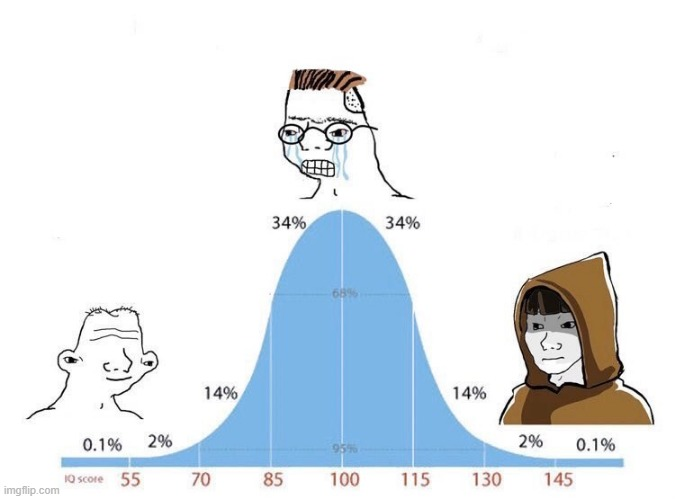

In [10]:
img = response.json()['data']['memes'][76]['url']

img_response = requests.get(img)
display.Image(img_response.content)

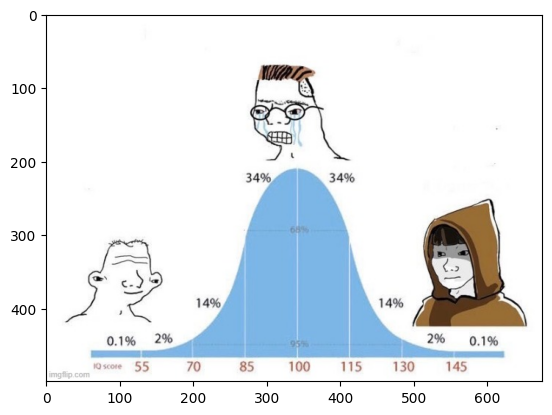

In [11]:
img = plt.imread(BytesIO(img_response.content), format = 'jpg')
plt.imshow(img)

NameError: name 'flatten' is not defined

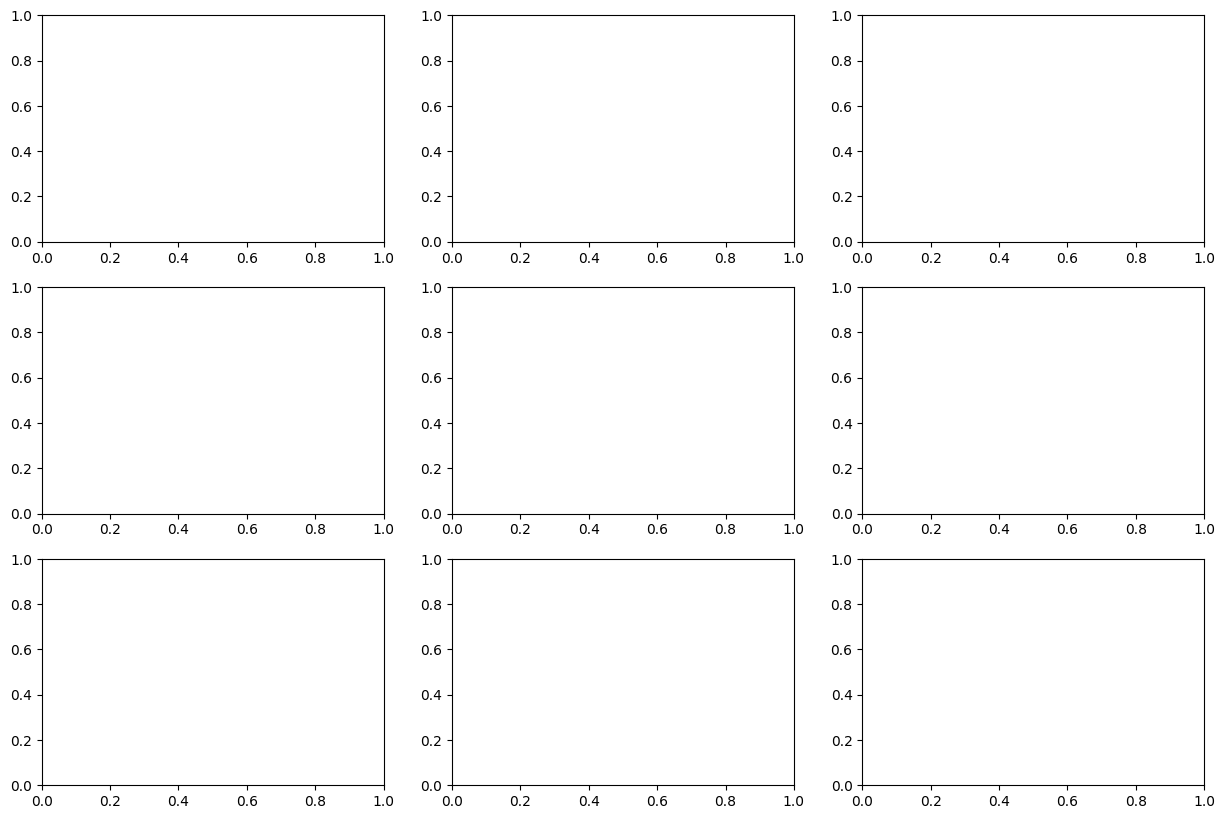

In [12]:
nrows, ncols = 3, 3
figsize = (15, 10)

fig, axis = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

for i, ax in enumerate(axis, flatten()):
    img_url = response.json()['data']['memes'][i]['url']

    img_response = requests.get(img_url)

    img = plt.imread(BytesIO(img_response.content), format='jpg')

    ax = imshow(img)
    ax.set_title(response.json()['data']['memes'][i]['name'])
    ax.axis('off')

In [20]:
url = 'https://api.imgflip.com/caption_image'

params = {
    'template_id': '124822590',
    'username': 'zernovga',
    'password': 'nJkiGV9TMi$UJTV',
    'text0': 'пойти сразу на пару',
    'text1': 'пойти на завтрак'
}

response = requests.post(url, params=params)
response.json()

{'success': True,
 'data': {'url': 'https://i.imgflip.com/8fkt7h.jpg',
  'page_url': 'https://imgflip.com/i/8fkt7h'}}

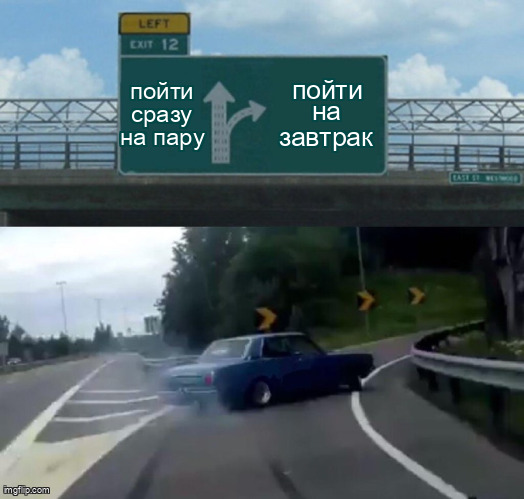

In [22]:
display.Image(requests.get(response.json()['data']['url']).content)

## Задание для самостоятельной работы

[ALPHA VANTAGE](https://www.alphavantage.co/) - сайт с API для доступа к биржевым данным и параметрам.

Необходимо зарегистрироваться и получить бесплатный ключ API. 

**ВАЖНО: ключ придется восстанавливать, если вы его потеряете. На сайте он отображается 1 раз. Сразу скопируйте ключ себе и сохраните!**

Получите информацию о стоимости акций компании NVIDIA (обозначение на рынке ценных бумаг **NVDA**) с частотой в 1 день.

In [2]:
import requests
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NVDA&apikey=8XDV587R3BNXN3SS'
r = requests.get(url)
data = r.json



<bound method Response.json of <Response [200]>>

Выделите данные о цене закрытия торгов в течении каждого дня в отдельный массив и постройте график.

In [5]:
import requests
import matplotlib.pyplot as plt

url ='https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NVDA&apikey=9BUEGJOA3TSDR518'
r = requests.get(url)
data = r.json()
close_price = []

for i in range(1, 29):
    close_price.append(float(data['Time Series (Daily)'][i]['4. close']))

plt.figure(figsize=(15, 10))
plt.plot(close_price, label='Closing Price')
plt.xlabel('День')
plt.ylabel('Цена')
plt.title('Цена закрытия торгов')
plt.legend()
plt.show()

KeyError: 1

Получите аналогично данные AMD и Intel. Постройте график отображающий изменения стоимость акций 3 компаний.

In [ ]:
import requests
import matplotlib.pyplot as plt


url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NVDA&apikey=9BUEGJOA3TSDR518'
r = requests.get(url)
data_NVDA = r.json()
close_price_NVDA = []


for i in data_NVDA['Time Series (Daily)']:
    close_price_NVDA.append(float(data_NVDA['Time Series (Daily)'][i]['4. close']))

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMD&apikey=9BUEGJOA3TSDR518'
r = requests.get(url)
data_AMD = r.json()
close_price_AMD = []

for i in data_AMD['Time Series (Daily)']:
    close_price_AMD.append(float(data_AMD['Time Series (Daily)'][i]['4. close']))

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=INTC&apikey=9BUEGJOA3TSDR518'
r = requests.get(url)
data_INTC = r.json()
close_price_INTC = []

for i in data_INTC['Time Series (Daily)']:
    close_price_INTC.append(float(data_INTC['Time Series (Daily)'][i]['4. close']))

days = range(1, len(close_price_NVDA) + 1)

plt.figure(figsize=(15, 10))
plt.plot(days, close_price_NVDA, label='NVDA')
plt.plot(days, close_price_AMD, label='AMD')
plt.plot(days, close_price_INTC, label='INTC')
plt.xlabel('день')
plt.ylabel('цена')
plt.title('цена закрытия торгов')
plt.legend()
plt.show()

Получите информацию о топ-3 криптовалютах: Bitcoin BTC, Ethereum ETH, Tether USDT. Постройте график с полученной информацией.

In [6]:
import requests
import matplotlib.pyplot as plt


url = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=USD&apikey=9BUEGJOA3TSDR518'
r = requests.get(url)
data_BTC = r.json()
close_price_BTC = []

for i in data_BTC['Time Series (Digital Currency Daily)']:
    close_price_BTC.append(float(data_BTC['Time Series (Digital Currency Daily)'][i]['4a. close (USD)']))

url = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=ETH&market=USD&apikey=9BUEGJOA3TSDR518'
r = requests.get(url)
data_ETH = r.json()
close_price_ETH = []

for i in data_ETH['Time Series (Digital Currency Daily)']:
    close_price_ETH.append(float(data_ETH['Time Series (Digital Currency Daily)'][i]['4a. close (USD)']))


days = range(1, len(close_price_BTC) + 1)

plt.figure(figsize=(15, 10))
plt.plot(days, close_price_BTC, label='BTC')
plt.plot(days, close_price_ETH, label='ETH')
plt.xlabel('день')
plt.ylabel('цена')
plt.title('цена закрытия торгов')
plt.legend()
plt.show()




KeyError: 'Time Series (Digital Currency Daily)'